In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [76]:
# loading the dataset
df = pd.read_csv("/content/Walmart Data Analysis and Forcasting.csv")
df.sample(10)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
5650,40,01-07-2011,1048866.30,0,65.25,3.815,135.446800,4.584
2997,21,21-09-2012,667151.46,0,71.54,3.721,222.416936,6.565
4818,34,30-12-2011,965512.36,1,28.84,3.119,130.071032,10.148
1674,12,13-01-2012,865467.86,0,48.07,3.657,130.244000,12.187
3755,27,22-10-2010,1693935.29,0,52.82,3.049,136.688871,8.021
5864,42,12-02-2010,575709.96,1,49.96,2.828,126.496258,9.765
5711,40,31-08-2012,987264.67,0,66.11,3.884,138.377194,4.156
1332,10,17-12-2010,2811646.85,0,59.15,3.125,126.879484,9.003
2093,15,04-11-2011,615121.78,0,43.39,3.738,136.475129,7.866
3709,26,31-08-2012,1053495.51,0,63.69,3.884,138.377194,7.405


In [77]:
# shape of the dataset
df.shape

(6435, 8)

In [78]:
# not null values in the dataset columns
df.info()
# checking the datatype of each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [79]:
# dropping the duplicated rows
df.drop_duplicates()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


In [80]:
# changing the datatype of Date to Datetime
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

In [86]:
# Extract year, month, and day from the 'Date' column
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
# also dropping the Date column
df = df.drop(columns="Date")

In [87]:
# changing the datatype of Year, Month, Day to int
df['Year'] = df['Year'].astype(int)
df['Month'] = df['Month'].astype(int)
df['Day'] = df['Day'].astype(int)

In [88]:
# statistical description of dataset
df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Day
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151,2010.965035,6.447552,15.678322
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885,0.797019,3.238308,8.755780
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000,2010.000000,1.000000,1.000000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000,2010.000000,4.000000,8.000000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000,2011.000000,6.000000,16.000000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000,2012.000000,9.000000,23.000000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000,2012.000000,12.000000,31.000000


In [89]:
# checking unique values in the dataset
df['Temperature'].unique()
# all the columns didn't contain any irrelavant data or special type words

array([42.31, 38.51, 39.93, ..., 75.87, 77.55, 74.09])

In [90]:
# number of null values in data
df.isnull().sum()

,0
Store,0
Weekly_Sales,0
Holiday_Flag,0
Temperature,0
Fuel_Price,0
CPI,0
Unemployment,0
Year,0
Month,0
Day,0


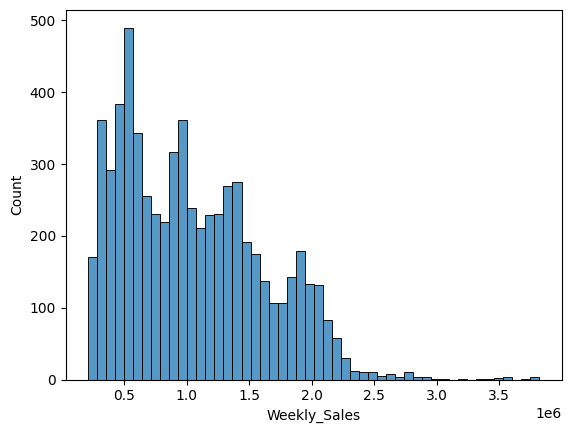

In [91]:
# distribution of weekly sales
sns.histplot(df['Weekly_Sales'], bins=50)
plt.show()

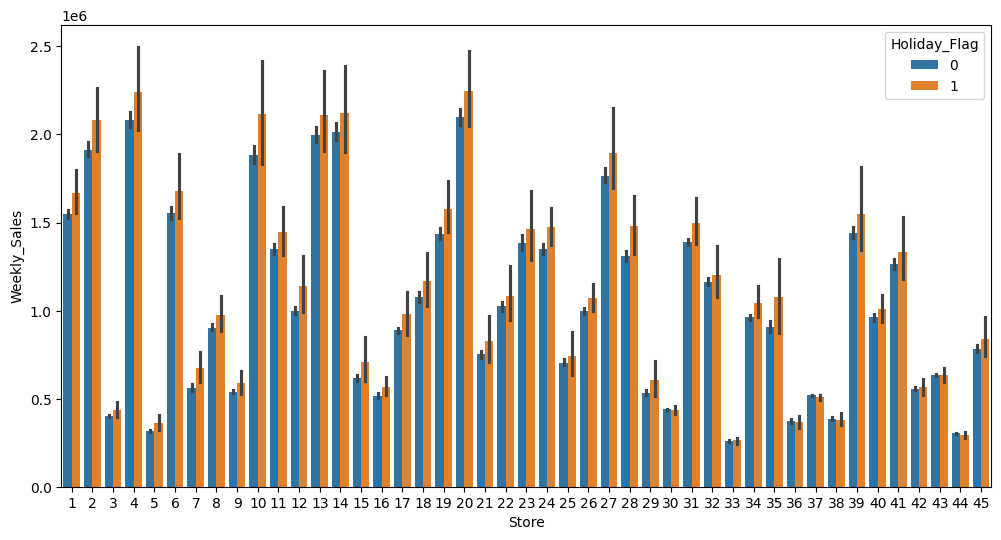

In [92]:
# the average Weekly Sales by store and holiday flag
plt.figure(figsize=(12, 6))  # Seting the figure size
sns.barplot(x='Store', y='Weekly_Sales', hue='Holiday_Flag', data=df)
plt.show()

# 1 --> Holiday week
# 0 --> Non-holiday week
# from the below graph we can observe that in every store, Holiday Weeks have more Weekly Sales in the region.

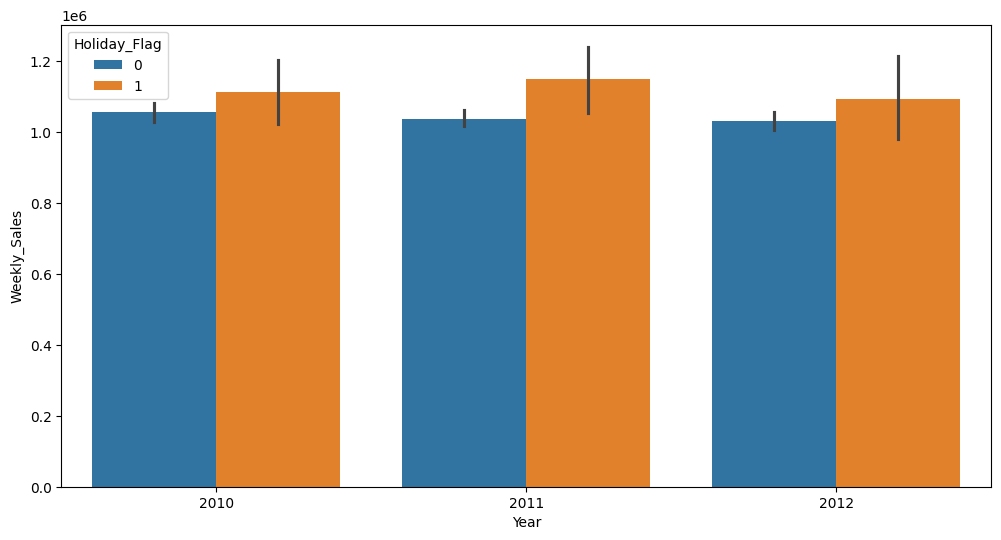

In [94]:
# we have the highest Weekly sales on Holiday week is on Year 2011 and on Non-holiday week we have highest sales in 2010
plt.figure(figsize=(12, 6))  # Seting the figure size
sns.barplot(x='Year', y='Weekly_Sales', hue='Holiday_Flag', data=df)
plt.show()

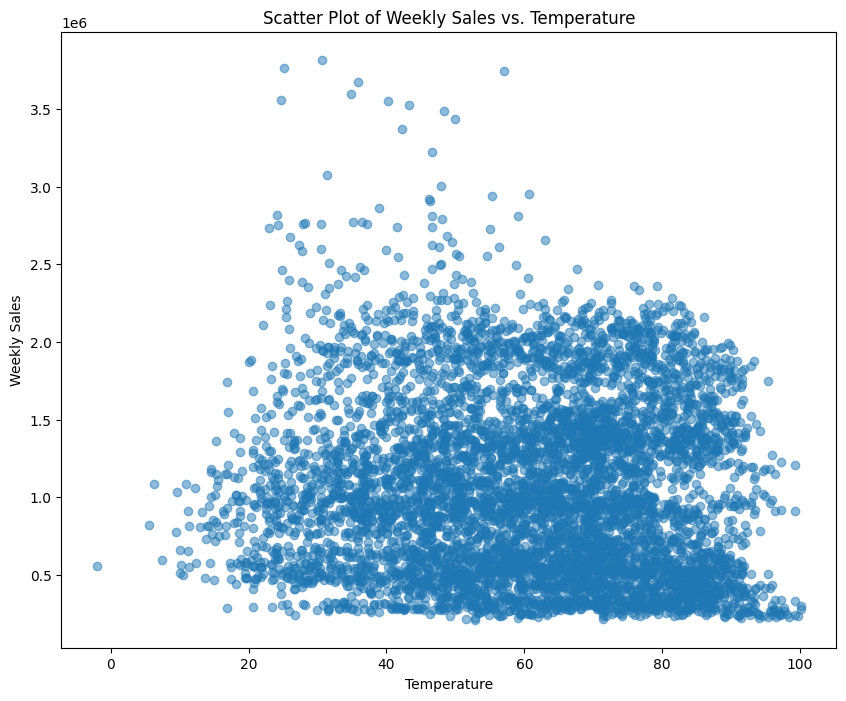

In [126]:
# scatter plot of Weekly_Sales against Temperature
fig, ax = plt.subplots(figsize=(10,8))
ax.scatter(df['Temperature'], df['Weekly_Sales'], alpha=0.5)
ax.set_xlabel('Temperature')
ax.set_ylabel('Weekly Sales')
ax.set_title('Scatter Plot of Weekly Sales vs. Temperature')
plt.show()

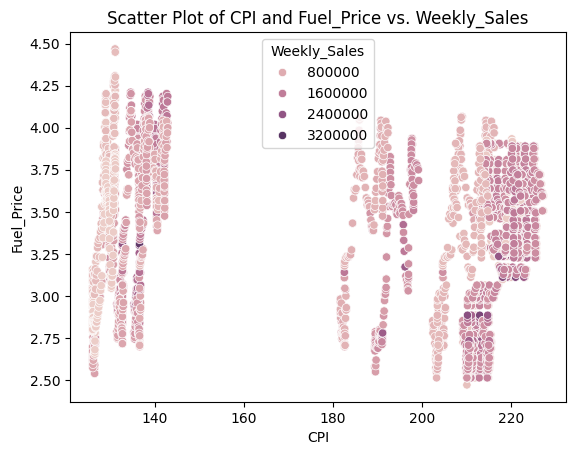

In [128]:
# Scatter plot of CPI and Fuel_Price against Weekly_Sales using seaborn
sns.scatterplot(x='CPI', y='Fuel_Price', hue='Weekly_Sales', data=df)
plt.title('Scatter Plot of CPI and Fuel_Price vs. Weekly_Sales')
plt.show()
# there is no much correlation between the weekly sales to CPI and Fuel_Price

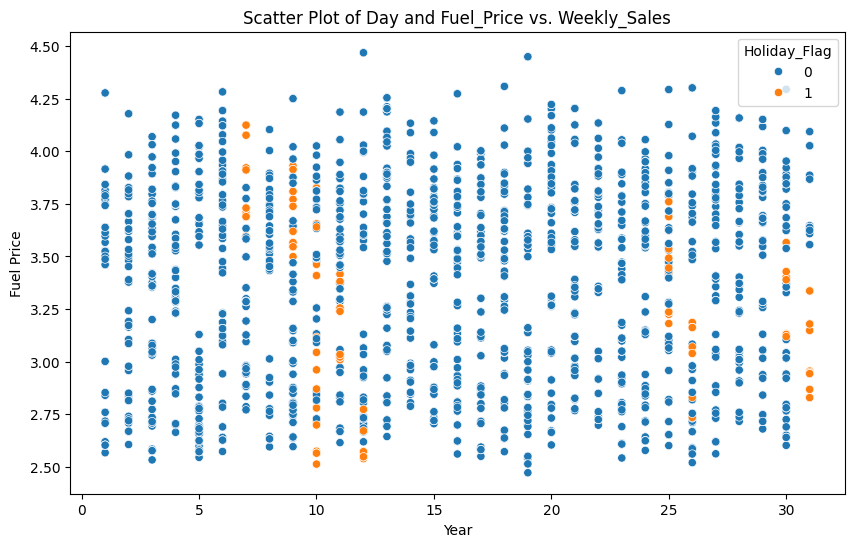

In [142]:
# scatter plot between the Year and the fuel_Price
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Day', y='Fuel_Price', hue='Holiday_Flag', data=df)
plt.title('Scatter Plot of Day and Fuel_Price vs. Weekly_Sales')
plt.xlabel('Year')
plt.ylabel('Fuel Price')
plt.show()

In [95]:
# What is the total weekly sales for all stores?
total_weekly_sales = df['Weekly_Sales'].sum()
print("Total weekly sales for all stores:", total_weekly_sales)
avg_weekly_sales = df['Weekly_Sales'].mean()
print("Average weekly sales for all stores:", avg_weekly_sales)

Total weekly sales for all stores: 6737218987.11
Average weekly sales for all stores: 1046964.8775617715


In [96]:
# Average weekly sales of each store
avg_weekly_sales = df.groupby('Store')['Weekly_Sales'].mean()
print(avg_weekly_sales)

Store
1     1.555264e+06
2     1.925751e+06
3     4.027044e+05
4     2.094713e+06
5     3.180118e+05
6     1.564728e+06
7     5.706173e+05
8     9.087495e+05
9     5.439806e+05
10    1.899425e+06
11    1.356383e+06
12    1.009002e+06
13    2.003620e+06
14    2.020978e+06
15    6.233125e+05
16    5.192477e+05
17    8.935814e+05
18    1.084718e+06
19    1.444999e+06
20    2.107677e+06
21    7.560691e+05
22    1.028501e+06
23    1.389864e+06
24    1.356755e+06
25    7.067215e+05
26    1.002912e+06
27    1.775216e+06
28    1.323522e+06
29    5.394514e+05
30    4.385796e+05
31    1.395901e+06
32    1.166568e+06
33    2.598617e+05
34    9.667816e+05
35    9.197250e+05
36    3.735120e+05
37    5.189003e+05
38    3.857317e+05
39    1.450668e+06
40    9.641280e+05
41    1.268125e+06
42    5.564039e+05
43    6.333247e+05
44    3.027489e+05
45    7.859814e+05
Name: Weekly_Sales, dtype: float64


In [97]:
# the highest average sale is of which store?
avg_weekly_sales = df.groupby('Store')['Weekly_Sales'].mean().idxmax()
print("The highest average sale is of which store:", avg_weekly_sales)

The highest average sale is of which store: 20


In [98]:
# the lowest average sale is of which store?
avg_weekly_sales = df.groupby('Store')['Weekly_Sales'].mean().idxmin()
print("The lowest average sale is of which store:", avg_weekly_sales)

The lowest average sale is of which store: 33


In [99]:
#How many holiday weeks are there in the dataset?
num_holiday_weeks = df[df['Holiday_Flag'] == 1]['Holiday_Flag'].count()
print("Number of holiday weeks:", num_holiday_weeks)

Number of holiday weeks: 450


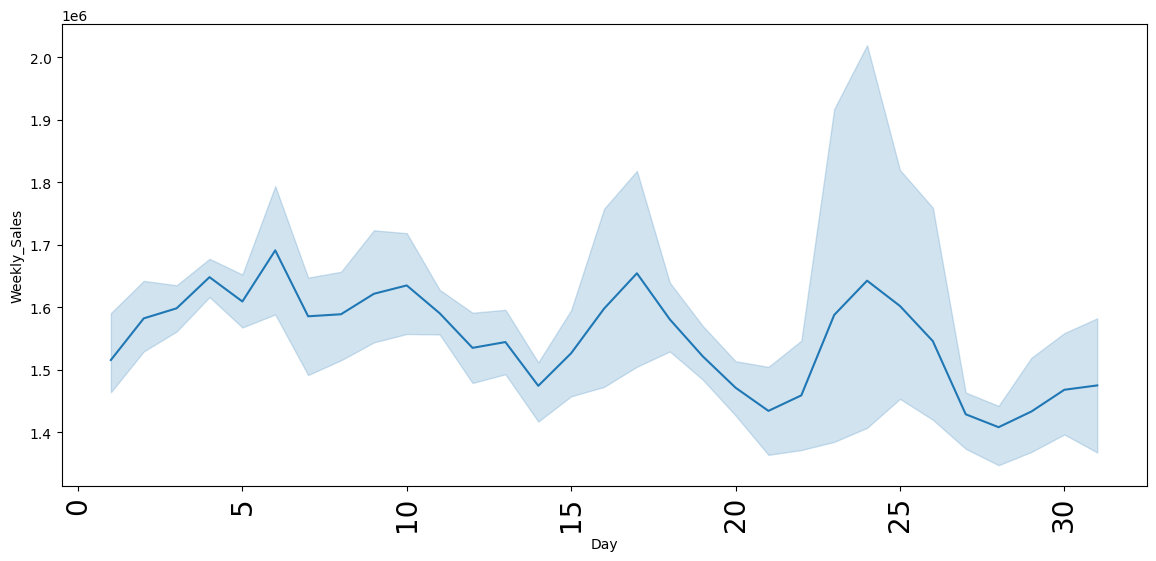

In [125]:
# trend of Weekly Sales over time for a single store
plt.figure(figsize=(14, 6))
store1_df = df[df['Store'] == 1]
sns.lineplot(x='Day', y='Weekly_Sales', data=store1_df)
plt.xticks(rotation=90, fontsize = 20)  # Rotate the x-axis labels by 90 degrees
plt.show()
# maximum sale in the day between 5-6 and then there is a sharp decrease in the weekly_sales
# same goes with 16-17 day and 23-24 day but in 23-24 there is not a sharp decrease there is gradually decreasing

In [118]:
#How many holiday weeks are there in the dataset?
num_holiday_weeks = df[df['Holiday_Flag'] == 1]['Holiday_Flag'].count()
print("Number of holiday weeks:", num_holiday_weeks)

#What is the total weekly sales during holiday weeks?
holiday_sales = df[df['Holiday_Flag'] == 1]['Weekly_Sales'].sum()
print("Total weekly sales during holiday weeks:", holiday_sales)

Number of holiday weeks: 450
Total weekly sales during holiday weeks: 505299551.56


In [120]:
#How many non-holiday weeks are there in the dataset?
num_non_holiday_weeks = df[df['Holiday_Flag'] == 0]['Holiday_Flag'].count()
print("Number of non-holiday weeks:", num_non_holiday_weeks)

#What is the total weekly sales during non-holiday weeks?
non_holiday_sales = df[df['Holiday_Flag'] == 0]['Weekly_Sales'].sum()
print("Total weekly sales during holiday weeks:", non_holiday_sales)

Number of non-holiday weeks: 5985
Total weekly sales during holiday weeks: 6231919435.55


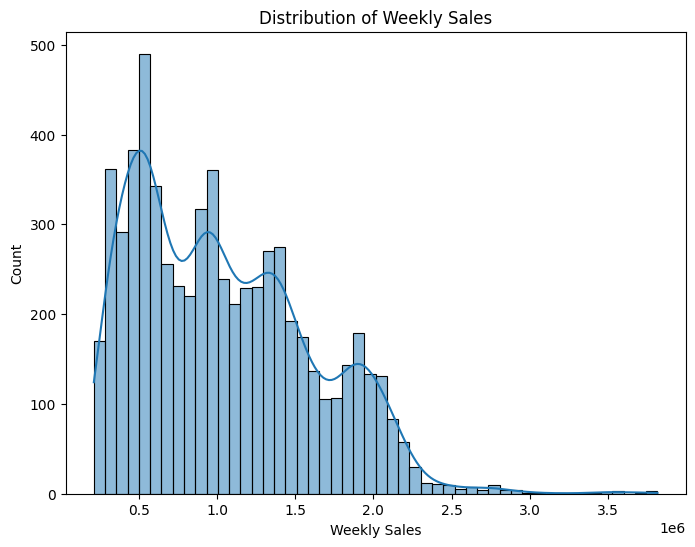

In [121]:
plt.figure(figsize=(8,6))

# Create histogram
sns.histplot(df['Weekly_Sales'], bins=50, kde=True)

# Set title and labels
plt.title('Distribution of Weekly Sales')
plt.xlabel('Weekly Sales')
plt.ylabel('Count')

# Show plot
plt.show()


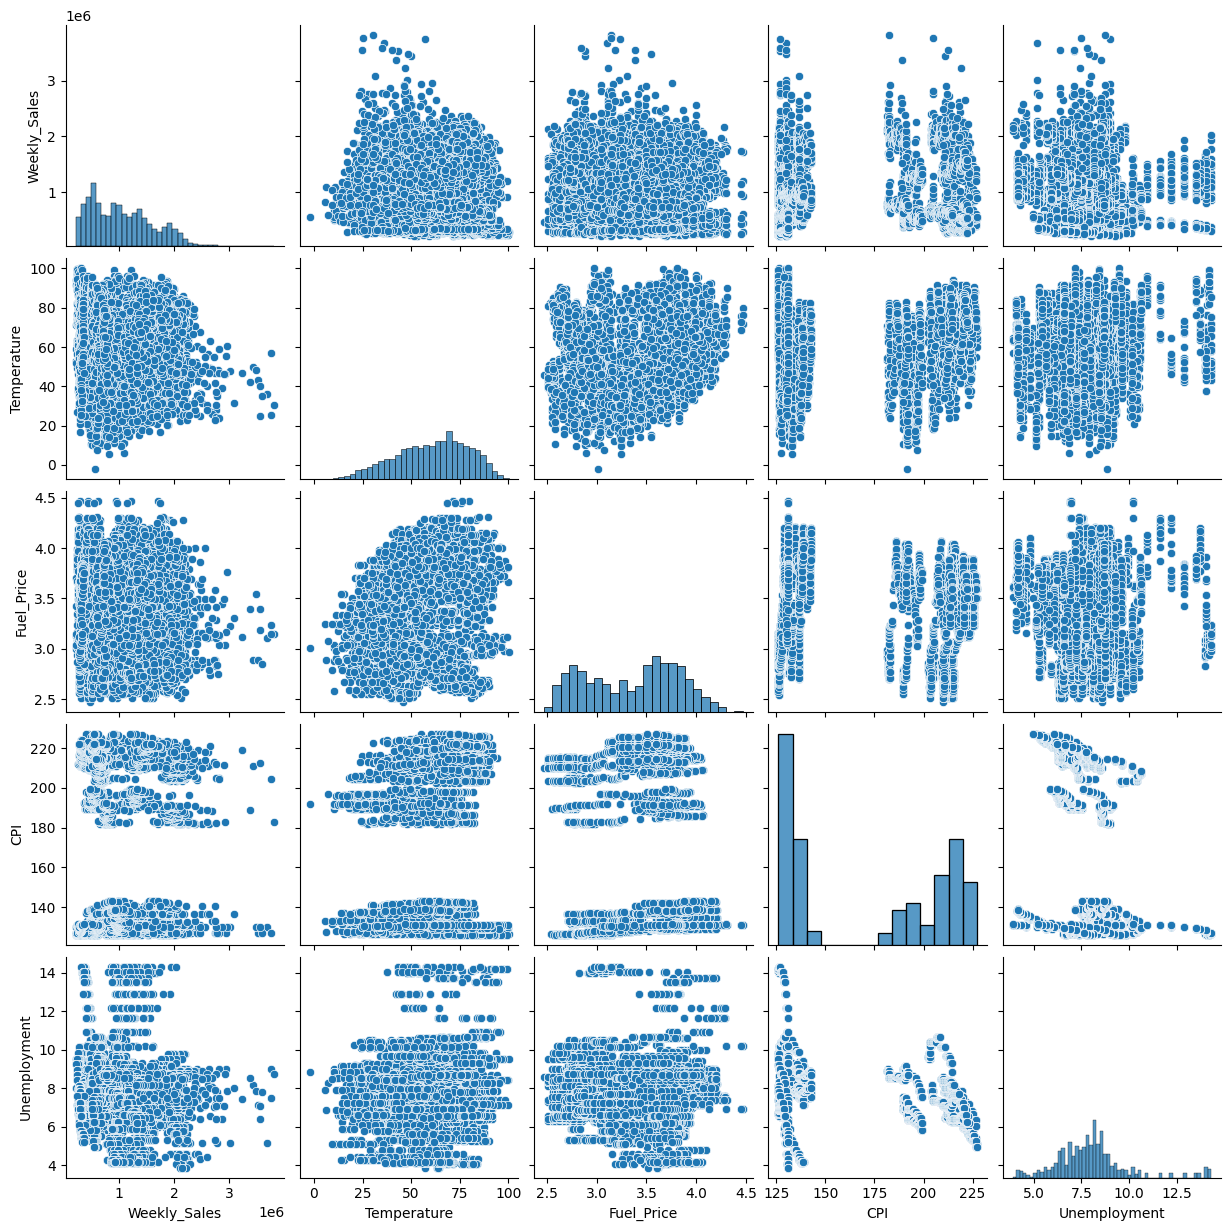

In [116]:
# relationships between variables
sns.pairplot(df[['Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']])
plt.show()

<Axes: xlabel='Year', ylabel='Month'>

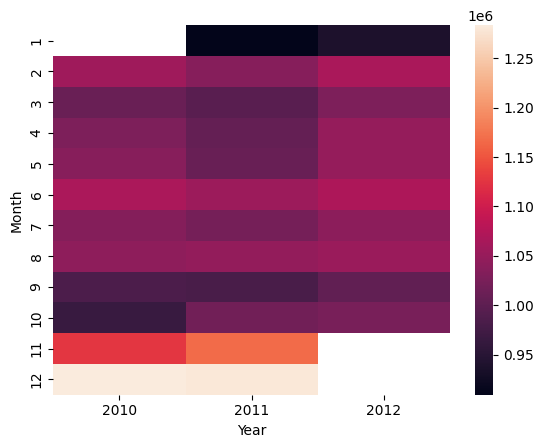

In [131]:
sns.heatmap(df.pivot_table(values='Weekly_Sales', index='Month', columns='Year'))

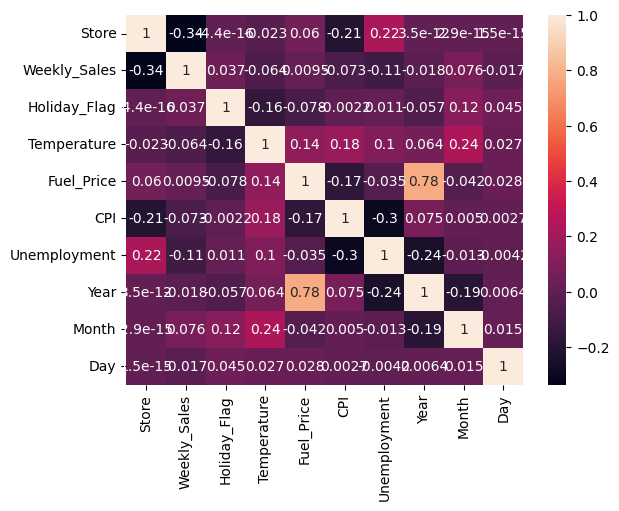

In [130]:
# the correlation between variables
sns.heatmap(df.corr(), annot=True)
plt.show()
# there is no significant relation between the features but there is some relation between the fuel_price and date

# The correlation coefficient ranges from -1 to 1, where a value of 1 indicates a perfect positive correlation,
# 0 indicates no correlation, and -1 indicates a perfect negative correlation.